## Build A Diverse Stock Portforlio with K-means

In [70]:
#import 

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [60]:
import yfinance as yf
import pandas as pd

# Example list of tickers (not the full list, just placeholders)
ticker_symbols = [
    "AAPL", "NVDA", "MSFT", "GOOG", "GOOGL", "AMZN", "META", "TSLA", "AVGO", "COST",
    "NFLX", "ASML", "TMUS", "CSCO", "PEP", "AZN", "LIN", "AMD", "ADBE", "ISRG",
    "INTU", "PLTR", "QCOM", "TXN", "BKNG", "HON", "CMCSA", "AMGN", "AMAT", "ARM",
    "PDD", "PANW", "ADP", "GILD", "APP", "ADI", "VRTX", "SBUX", "MRVL", "MU",
    "LRCX", "MELI", "CRWD", "PYPL", "INTC", "KLAC", "CDNS", "ABNB", "MDLZ", "MAR",
    "REGN", "SNPS", "CTAS", "FTNT", "CEG", "DASH", "WDAY", "ORLY", "MSTR", "TEAM",
    "ADSK", "CSX", "TTD", "CPRT", "ROP", "CHTR", "PCAR", "NXPI", "MNST", "PAYX",
    "ROST", "AEP", "DDOG", "FANG", "LULU", "AXON", "KDP", "FAST", "BKR", "VRSK",
    "XEL", "EA", "CTSH", "ODFL", "EXC", "KHC", "GEHC", "CCEP", "IDXX", "TTWO",
    "MCHP", "DXCM", "ANSS", "CSGP", "ZS", "ON", "WBD", "GFS", "CDW", "BIIB", "MDB"
]

start_date = "2015-01-01"
end_date = "2024-12-31"
start_date = "2015-01-01"
end_date = "2024-12-31"

# Initialize an empty DataFrame
final_df = pd.DataFrame()

for ticker in ticker_symbols:
    # Download data for each ticker
    df = yf.download(ticker, start=start_date, end=end_date)

    # Keep only 'Close' price
    df = df[['Close']]

    # Rename the 'Close' column to the ticker symbol
    df.rename(columns={"Close": ticker}, inplace=True)

    # Merge with the final DataFrame
    if final_df.empty:
        final_df = df
    else:
        final_df = final_df.join(df, how="outer")

# Ensure unique column headers by removing duplicate levels
if isinstance(final_df.columns, pd.MultiIndex):
    final_df.columns = final_df.columns.get_level_values(0)

# Sort by Date to ensure chronological order
final_df.sort_index(inplace=True)

# Optionally fill any missing values (e.g., due to different trading calendars)
final_df.fillna(method="ffill", inplace=True)
final_df.fillna(method="bfill", inplace=True)

final_df.to_csv("final_stock_data.csv", index=False)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

### Calculate Annual mean returns and variance

In [63]:
daily_returns = final_df.pct_change()
annual_mean_returns = daily_returns.mean()*252
annual_return_variance = daily_returns.var()*252

/tmp/ipykernel_510/3169485016.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = final_df.pct_change()


In [84]:
df2 = pd.DataFrame(final_df.columns, columns=['Price'])
df2['Vairances'] = annual_return_variance.values
df2['Returns'] = annual_mean_returns.values
df2 = df2.rename(columns={'Price': 'Stock_Symbols'})
df2

,Stock_Symbols,Vairances,Returns
0,AAPL,0.081033,0.274956
1,NVDA,0.236291,0.683911
2,MSFT,0.073677,0.273182
3,GOOG,0.081252,0.241068
4,GOOGL,0.081075,0.239061
...,...,...,...
96,WBD,0.198736,-0.018487
97,GFS,0.078455,0.031716
98,CDW,0.082061,0.212806
99,BIIB,0.177916,0.002826


### Elbow method

We are going to use the Elbow method to determine the number of clusters to use to group the stocks.

/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

Text(0, 0.5, 'Inertia (SSE)')

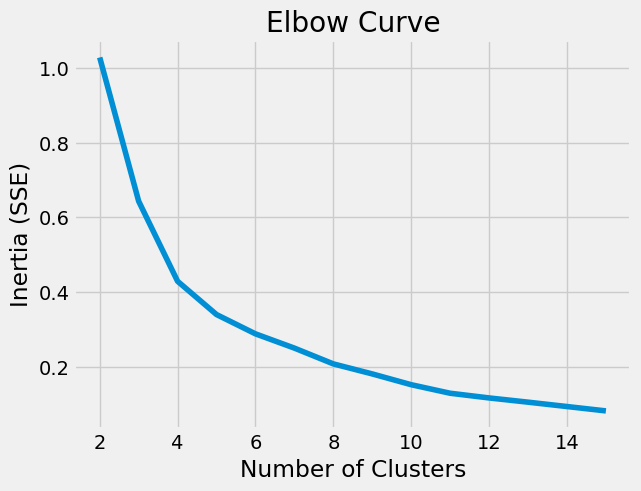

In [96]:
X = df2[['Returns', 'Vairances']].values
nan = np.nanmean(X)

X[np.isnan(X)] = nan

inertia_list = []

for k in range(2, 16):
    #train 
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_) #SSE 
    
#plot
plt.plot(range(2,16), inertia_list)
plt.title("Elbow Curve")
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (SSE)')

In [97]:
kmeans = KMeans(n_clusters = 4).fit(X)
labels = kmeans.labels_
labels

/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 3, 0, 0, 0, 1, 1, 3, 1, 0, 1, 0, 0, 2, 2, 2, 0, 3, 0, 0, 0, 1,
       0, 0, 0, 2, 2, 2, 1, 2, 1, 1, 0, 2, 1, 0, 0, 2, 1, 1, 1, 1, 1, 0,
       2, 1, 1, 2, 2, 0, 2, 0, 0, 1, 0, 2, 0, 0, 3, 1, 0, 0, 3, 0, 2, 2,
       0, 0, 2, 0, 0, 2, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2,
       0, 0, 0, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1], dtype=int32)

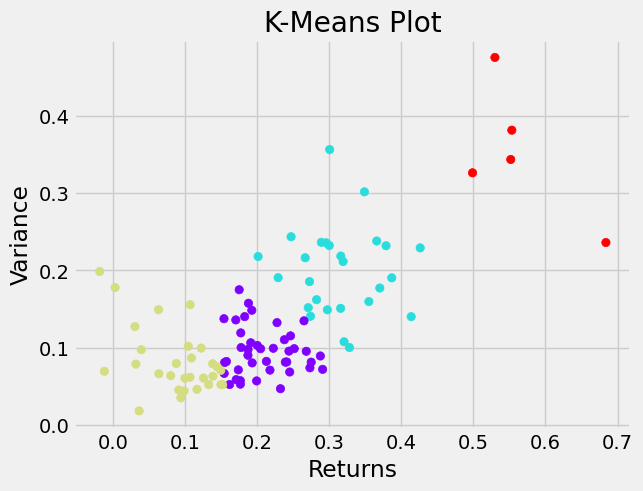

In [101]:
df2['Cluster_Labels'] = labels

#plot
plt.scatter(X[:,0], X[:,1], c = labels, cmap = 'rainbow')
plt.title("K-Means Plot")
plt.xlabel("Returns")
plt.ylabel("Variance")
plt.show()

### Build a simple diversed portfolio

In [102]:
def portfolio():
    for i in range(0,4): 
        symbol = df2[df2['Cluster_Labels'] == i].head(1)
        print(symbol[['Stock_Symbols','Cluster_Labels']])

In [103]:
portfolio()

  Stock_Symbols  Cluster_Labels
0          AAPL               0
  Stock_Symbols  Cluster_Labels
5          AMZN               1
   Stock_Symbols  Cluster_Labels
13          CSCO               2
  Stock_Symbols  Cluster_Labels
1          NVDA               3
